In [18]:
import numpy as np
import pandas as pd

df = pd.read_excel('Lab Session Data.xlsx', sheet_name=0)
df = df.iloc[:,:5]
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
C = df['Payment (Rs)'].to_numpy()

C = C.reshape(-1, 1)

dimensionality = A.shape[1]
print(f"Dimensionality of the vector space: {dimensionality}")

num_vectors = A.shape[0]
print(f"Number of vectors in the vector space: {num_vectors}")

rank_A = np.linalg.matrix_rank(A)
print(f"Rank of Matrix A: {rank_A}")

A_pseudo_inv = np.linalg.pinv(A)

X = A_pseudo_inv @ C

print("\nMatrix A:")
print(A)

print("\nMatrix C:")
print(C)

print("\nPseudo-Inverse of A:")
print(A_pseudo_inv)

print("\nCost of each product available for sale (Matrix X):")
print(X)


Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3

Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]

Matrix C:
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]

Pseudo-Inverse of A:
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]

Cost of each product available for sale (Matrix X):
[[ 1.]
 [55.]
 [18.]]


In [19]:
df['Class'] = np.where(df['Payment (Rs)'] > 200, 'RICH', 'POOR')

In [20]:
print(df)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Class
0      C_1           20             6                 2           386  RICH
1      C_2           16             3                 6           289  RICH
2      C_3           27             6                 2           393  RICH
3      C_4           19             1                 2           110  POOR
4      C_5           24             4                 2           280  RICH
5      C_6           22             1                 5           167  POOR
6      C_7           15             4                 2           271  RICH
7      C_8           18             4                 2           274  RICH
8      C_9           21             1                 4           148  POOR
9     C_10           16             2                 4           198  POOR


In [21]:
#4Q
#i)
import pandas as pd
import statistics


df = pd.read_excel('Lab Session Data.xlsx', sheet_name=1)


prices = df['Price']


mean_price = statistics.mean(prices)
variance_price = statistics.variance(prices)

print(f"Mean Price: {mean_price}")
print(f"Variance Price: {variance_price}")


Mean Price: 1560.663453815261
Variance Price: 58732.365352539186


In [22]:
#4Q
#ii)
wednesdays = df[df['Day'] == 'Wed']
wednesday_prices = wednesdays['Price']

mean_wednesday_price = statistics.mean(wednesday_prices)

print(f"Mean Price on Wednesdays: {mean_wednesday_price}")
print(f"Population Mean Price: {mean_price}")


Mean Price on Wednesdays: 1550.706
Population Mean Price: 1560.663453815261


In [23]:
#4Q
#iii)
# Filter for April
april_data = df[df['Month'] == 'Apr']
april_prices = april_data['Price']

# Calculate sample mean for April
mean_april_price = statistics.mean(april_prices)

print(f"Mean Price in April: {mean_april_price}")
print(f"Population Mean Price: {mean_price}")


Mean Price in April: 1698.9526315789474
Population Mean Price: 1560.663453815261


In [24]:
#4Q
#iV)
df['Chg%'] = df['Chg%'].astype(float) / 100
loss_prob = len(df[df['Chg%'] < 0]) / len(df)

print(f"Probability of Making a Loss: {loss_prob}")


Probability of Making a Loss: 0.4979919678714859


In [25]:
#4Q
#V)
wednesday_chg = wednesdays['Chg%']

profit_prob_wed = len(wednesday_chg[wednesday_chg > 0]) / len(wednesday_chg)

print(f"Probability of Making a Profit on Wednesdays: {profit_prob_wed}")


Probability of Making a Profit on Wednesdays: 0.42


In [26]:
#4Q
#Vi)

wednesday_data = df[df['Day'] == 'Wed']


wednesday_count = len(wednesday_data)
wednesday_profit_count = len(wednesday_data[wednesday_data['Chg%'] > 0])

conditional_prob = wednesday_profit_count / wednesday_count

print(f"Conditional Probability of Making a Profit Given that Today is Wednesday: {conditional_prob}")


Conditional Probability of Making a Profit Given that Today is Wednesday: 0.42


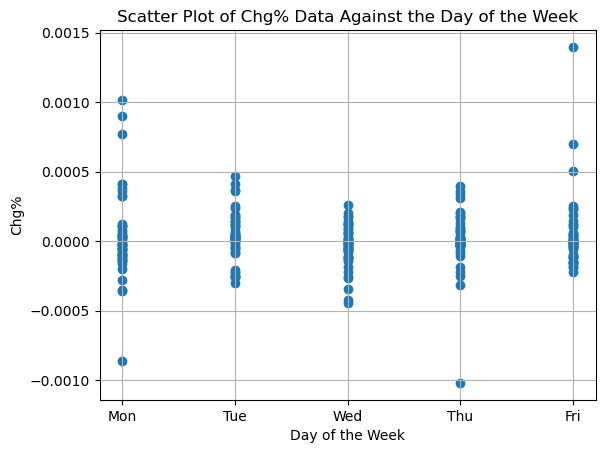

In [27]:
#4Q
#vii)
import matplotlib.pyplot as plt

day_mapping = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4}
df['Day_num'] = df['Day'].map(day_mapping)

plt.scatter(df['Day_num'], df['Chg%'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% Data Against the Day of the Week')
plt.xticks(ticks=list(day_mapping.values()), labels=list(day_mapping.keys()))
plt.grid(True)
plt.show()
